### ボルダルールによる選好プロファイルの集約
- スコアリングルール:  
  各投票者は自身の選好順序全体を申告する。
  各選択肢 $o \in O$ について，
  $o$ を第 $k$ 位に位置づける投票者の人数を $X_k(o)$，
  第 $k$ 位の選択肢に与える得点係数を $w_k$
  と置き，総得点を次式により求める（$m = |O|$）。
  
  $$
  \begin{aligned}
      \zeta(o) = \sum_{k=1}^{m} w_k X_k(o) 
  \end{aligned}
  $$

  $\zeta(o)$ が大きい順に選択肢を並べた順序を
  社会選好順序として採択する。

- ボルダルール:  
  スコアリングルールにおいて個人の選好順序で上から第 $k$ 位の選択肢に
  与える得点係数 $w_k$ について，

  $$
      \begin{aligned}
          w_k - w_{k+1} = w_{k+1} - w_{k+2} = \text{const.}
      \end{aligned}
  $$

  が成立するとき，そのルールをボルダルールと呼ぶ。
  
  特に $w_k - w_{k+1} = 1$ かつ $w_m = 0$
  とすると， $w_k = m - k$ となる（$m = |O|$）。

borda_score: {'a': 202, 'b': 208, 'c': 184}


tally:  
a $\succ$ b $\succ$ c: &emsp; 37  
a $\succ$ c $\succ$ b: &emsp; 53  
b $\succ$ a $\succ$ c: &emsp; 10  
b $\succ$ c $\succ$ a: &emsp; 65  
c $\succ$ a $\succ$ b: &emsp; 12  
c $\succ$ b $\succ$ a: &emsp; 21  


social order: &emsp;b $\succ$ a $\succ$ c

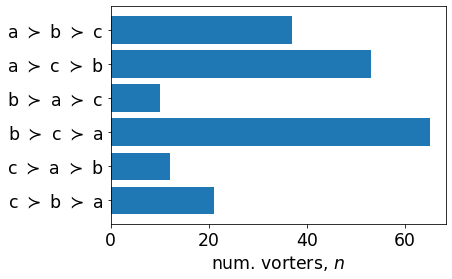

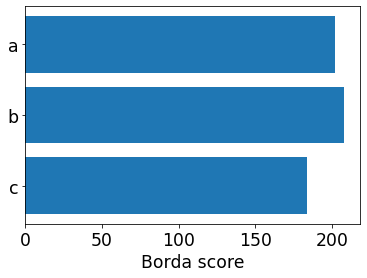

In [15]:
import itertools as it
import numpy as np
# from scipy.stats import randint
import scipy.stats
from IPython.display import display_markdown
import matplotlib.pyplot as plt

plt.rcParams['ytick.labelsize'] = 'xx-large' #'large'
plt.rcParams['xtick.labelsize'] = 'xx-large' #'large'
plt.rcParams['axes.labelsize'] = 'xx-large' #'large'

alternatives = ('a', 'b', 'c') 
preferences = np.array(tuple(it.permutations(alternatives)))
if False:
    num_voters = 100 # 5 #6
    profile_idx = scipy.stats.randint.rvs(0, len(preferences), size=num_voters)
    profile = preferences[profile_idx]

elif True:
    # tally = {('a', 'b', 'c'): 30,
    #          ('a', 'c', 'b'): 56,
    #          ('c', 'a', 'b'): 7,
    #          ('c', 'b', 'a'): 28,
    #          ('b', 'c', 'a'): 62,
    #          ('b', 'a', 'c'): 15}

    tally = {('a', 'b', 'c'): 37,
             ('a', 'c', 'b'): 53,
             ('c', 'a', 'b'): 12,
             ('c', 'b', 'a'): 21,
             ('b', 'c', 'a'): 65,
             ('b', 'a', 'c'): 10}

    # tally = {('a', 'b', 'c'): 17,
    #          ('a', 'c', 'b'): 18,
    #          ('c', 'a', 'b'): 8,
    #          ('c', 'b', 'a'): 9,
    #          ('b', 'c', 'a'): 26,
    #          ('b', 'a', 'c'): 0}

    # tally = {('a', 'b', 'c'): 18,
    #          ('a', 'c', 'b'): 19,
    #          ('c', 'a', 'b'): 8,
    #          ('c', 'b', 'a'): 8,
    #          ('b', 'c', 'a'): 25,
    #          ('b', 'a', 'c'): 0}

    profile = np.array(tuple(it.chain.from_iterable(it.repeat(p, v) for p, v in tally.items())))
    num_voters = len(profile) 
elif False:
    profile = np.array((('a', 'b', 'c'),
                        ('b', 'c', 'a'),
                        ('c', 'a', 'b')))
    num_voters = len(profile) 
else:
    profile = preferences
    num_voters = len(profile) 

pref_str = lambda p: r' $\succ$ '.join(p)
# display_markdown('  \n'.join(f'voter {i}: &emsp;' + pref_str(p) for i, p in enumerate(profile)), raw=True)

m = len(alternatives)
borda_score = {a: 0 for a in alternatives}
for pref in profile:
    for a in alternatives:
        bs = m - (np.flatnonzero(pref == a)[0] + 1)
        borda_score[a] += bs
print(f'borda_score: {borda_score}')

# randint.rvs() で profile を生成した場合を想定して選好タイプについての集計を行う
tally = {tuple(p): 0 for p in preferences}
for p in profile:
    tally[tuple(p)] += 1


# print(f'tally: {repr(tally)}')
md_txt = 'tally:  \n'
for k, v in tally.items():
    # print(f'{k}: {v}')
    md_txt += f'{pref_str(k)}: &emsp; {v}  \n'
display_markdown(md_txt, raw=True)

idx = np.argsort(tuple(borda_score.values()))
display_markdown('social order: &emsp;' + pref_str(np.array(tuple(borda_score.keys()))[idx[::-1]]), raw=True)
plt.figure()
plt.barh(np.arange(len(tally.keys()))[::-1], 
         tuple(tally.values()),
         tick_label=[pref_str(k) for k in tally.keys()])
plt.xlabel('num. vorters, $n$')
plt.savefig('generated_preferences.pdf', bbox_inches='tight')

plt.figure()
plt.barh(np.arange(len(borda_score.keys()))[::-1],
        tuple(borda_score.values()),
        tick_label=tuple(borda_score.keys()))
plt.xlabel('Borda score')
plt.savefig('borda_score.pdf', bbox_inches='tight')

#### 解説
- 以下の解説のセルを正常に実行するには Notebook の最初から順にセルを実行しておく必要がある。
- 選好プロファイルの生成については，`ch10_plurality_voting.ipynb` を参照。

選好順序に応じた得点係数 $w_k = m - k$ ，すなわち，
```Python
        bs = m - (np.flatnonzero(pref == a)[0] + 1)
```
について，
[`numpy.flatnonzero(arr)`](https://numpy.org/doc/stable/reference/generated/numpy.flatnonzero.html) 
は `arr` が bool型の配列の場合，True に対応する要素のインデックスを並べた配列を返す
(ただし，このときのインデックスは，`arr` を1次元の配列に変換したときのインデックスとなる)。
結果として， `(np.flatnonzero(pref == a)[0] + 1)` は選好順序 `pref` における選択肢 `a` の順位 $k$ となる。

In [16]:
pref = profile[0]
print(repr(pref))

arr = (pref == 'a')
print("(pref == 'a') ==", arr)
print("(pref == 'a').shape ==", arr.shape)
print("np.flatnonzero(pref == 'a') == ", np.flatnonzero(arr))
print("np.flatnonzero(pref == 'a')[0] == ", np.flatnonzero(arr)[0])
print()


array(['a', 'b', 'c'], dtype='<U1')
(pref == 'a') == [ True False False]
(pref == 'a').shape == (3,)
np.flatnonzero(pref == 'a') ==  [0]
np.flatnonzero(pref == 'a')[0] ==  0



`for pref in profile:` について，`pref` は `profile` の各行，すなわち，各選好順序に対応する。

In [17]:
print('profile.shape ==', profile.shape)

for pref in profile:
    print('pref.shape ==', pref.shape)
    print('pref ==', pref)
    break

profile.shape == (198, 3)
pref.shape == (3,)
pref == ['a' 'b' 'c']


[`numpy.argsort()`](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
による整列
```Python
    idx = np.argsort(tuple(borda_score.values()))
```
の結果の `idx` は配列の要素を昇順に並べる。
[スライス表記](https://docs.python.org/ja/3/reference/expressions.html#slicings) 
 `idx[::-1]` で逆順にすれば，降順になる。

In [25]:
print(borda_score.values())
print(borda_score.keys())
print(tuple(borda_score.keys()))
print('昇順: ', np.array(tuple(borda_score.keys()))[idx])
print('降順: ', np.array(tuple(borda_score.keys()))[idx[::-1]])

dict_values([202, 208, 184])
dict_keys(['a', 'b', 'c'])
('a', 'b', 'c')
昇順:  ['c' 'a' 'b']
降順:  ['b' 'a' 'c']
